# Assignment 1 Question 9

Benjamin Luo

CAP6619 Summer Term 2024

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [4]:
# Read housing.header.txt as a dataframe.
df = pd.read_csv('housing.header.txt')
df

# Report number of instances and features
# There are 506 instances and 14 features in the dataset

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


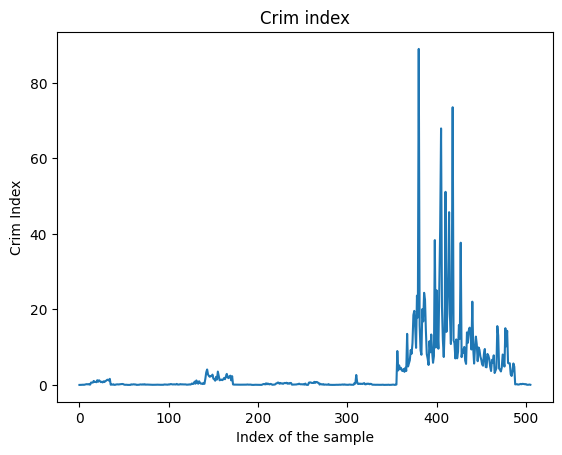

In [5]:
#Report all samples with respect to the Crim index on a plot 
# (the x-axis shows the index of the sample, and the 
# y-axis shows the Crim index of the sample).
y = df['Crim']
x = df.index
plt.plot(x,y)
plt.title('Crim index')
plt.xlabel('Index of the sample')
plt.ylabel('Crim Index')
plt.show()

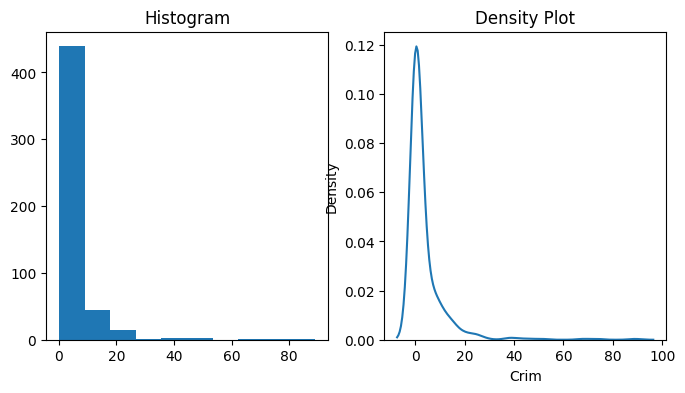

In [6]:
# Show both histogram of the Crim Index and the density of the 
# Crim index on a 1x2 frame (one row two columns).
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 4))


ax1.hist(y)
ax1.set_title('Histogram')
ax2 = plt.subplot(1,2,2)
ax2.set_title('Density Plot')
sb.kdeplot(y)
plt.show()


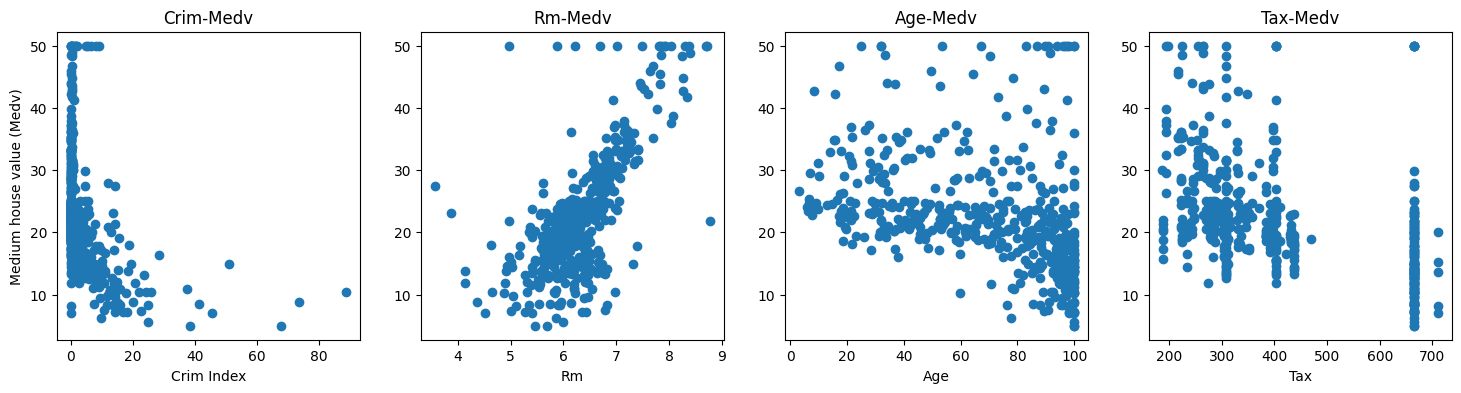

In [4]:
# Show following four scatter plots in one frame (1x4),
# - crim-medv, Rm-medv, Age-medv, Tax-medv

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18, 4))

ax1.scatter(df['Crim'],df['Medv'])
ax1.set_xlabel('Crim Index')
ax1.set_ylabel('Medium house value (Medv)')
ax1.set_title('Crim-Medv')

ax2.scatter(df['Rm'], df['Medv'])
ax2.set_xlabel('Rm')
ax2.set_title('Rm-Medv')

ax3.scatter(df['Age'], df['Medv'])
ax3.set_xlabel('Age')
ax3.set_title('Age-Medv')

ax4.scatter(df['Tax'], df['Medv'])
ax4.set_xlabel('Tax')
ax4.set_title('Tax-Medv')
plt.show()

**Explain how are they (Crim, Rm, Age, Tax) correlated to the medium house value (Medv).** 

*Crim index* does not seem to be indicative of value at less than 1, but as the value of the Crim index grows, Medv trends downwards.

As *Rm* increases, Medv also increases in value.

*Age* does not seem to be related in any particular way to Medv.

*Tax* also does not seem to be related, but over a certain threshold, there does seem to be a decrease in value of Medv.

In [5]:
# Create a subset which only includes properties with Crim less than 1 (inclusive)
# and Rm greater than 6 (inclusive).

subset = df[(df['Crim']<=1) & (df['Rm'] >= 6)]
subset.head()

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


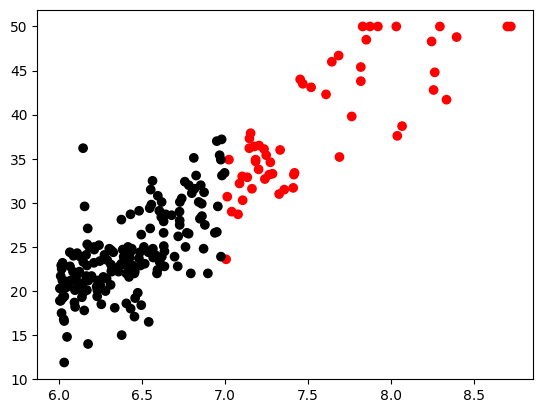

In [6]:
# Show a scatter plot between Rm and Medv (x=Rm, y=Medv)
# Color >=7 Rm values as red, rest as black

color = np.where(subset['Rm'] >= 7, 'r', np.where(subset['Medv'], 'k','r'))
plt.scatter(subset['Rm'], subset['Medv'], c=color)
plt.show()


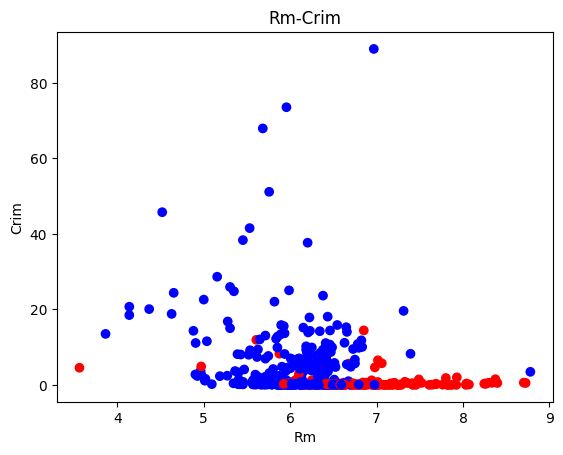

In [18]:
# Create a scatter plot between Rm and Crim and show all 506 properties on the plot.
# Color properties where Medv >= 24 as red, and rest as blue.

color = np.where(df['Medv'] >= 24, 'r', np.where(df['Crim'], 'b','r'))
scatter = plt.scatter(df['Rm'], df['Crim'], c=color)
plt.title('Rm-Crim')
plt.xlabel("Rm")
plt.ylabel("Crim")
plt.show()

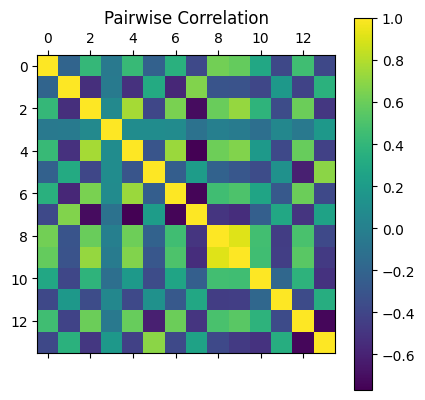

In [38]:
# Report the pairwise correlation between every two variables
# (either as a matrix or as a level plot)

pc = df.corr('pearson')
plt.matshow(pc)
plt.title('Pairwise Correlation')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

**Please explain which variable is most positively correlated to Medv, and which variable is most negatively correlated to Medv.**

The variable that is most positively correlated to Medv seems to be Rm; based on the pairwise correlation level plot, it is the closest to 1.0 of all the features, which suggests that it is the most positively correlated to Medv.

The variable that is most negatively correlated to Medv is Lstat; it has a correlation value of between roughly -0.6 and -0.8, which means that when Medv value goes up, Lstat value trends downwards, and vice versa.

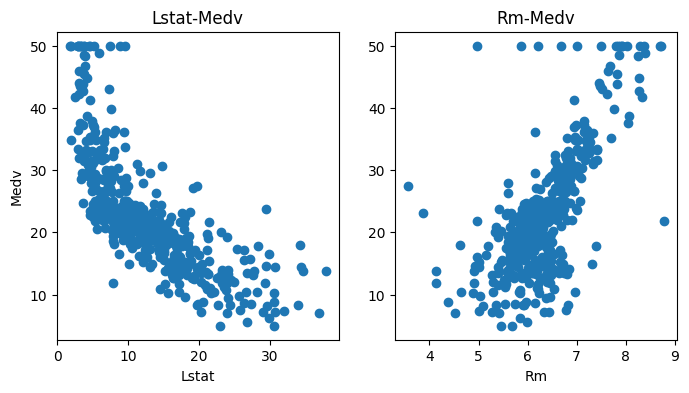

In [51]:
# Draw scatterplots to show relationship between each attribute and Medv
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.scatter(df['Lstat'], df['Medv'])
ax1.set_title('Lstat-Medv')
ax1.set_xlabel('Lstat')
ax1.set_ylabel('Medv')
ax2.scatter(df['Rm'], df['Medv'])
ax2.set_title('Rm-Medv')
ax2.set_xlabel('Rm')
plt.show()

**Explain how to use scatterplots to find attributes which are positively correlated, negatively correlated, or independent of Medv, respectively.**

Scatterplots can give us a good indication or visualization how the data points trend with regards to two variables. If the general slope of the data points are positive, and most points are in the trajectory of the best fit line, then there is a strong correlation between the attribute and Medv. The strength of the correlation depends on how many data points seem to adhere to this line. This is the same for negatively correlated attributes, just based on a negative/downwords slope.

If there is no pattern that can be seen, it is a good indicator that the attribute is simply independent of Medv.

In [55]:
# Create a new instance with the mentioned attribute values.

tmp = {'Crim':1.0, 'Zn':0.2,'Indus':6, 'Chas':0.1, 'Nox':6.5, 'Rm':5,
       'Age':100, 'Dis':4.1,'Rad':4.5,'Tax':21,'Ptratio':20,'B':300,
       'Lstat':12,'Medv':20.5}
df.loc[len(df)] = tmp
print(df.tail(1))

     Crim   Zn  Indus  Chas  Nox   Rm    Age  Dis  Rad  Tax  Ptratio      B  \
506   1.0  0.2    6.0   0.1  6.5  5.0  100.0  4.1  4.5   21     20.0  300.0   

     Lstat  Medv  
506   12.0  20.5  


In [57]:
# Report the number of instances and features of the new dataframe.
df

# There are 507 instances and 14 features.

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273,21.0,396.90,7.88,11.9


In [77]:
# Create a new feature (named 'Dummy'), and include the new feature into the 
# new dataframe as the last feature.
# the values of the Dummy feature are to be randomly generated within range [0,5].
import random

rand = [random.randrange(0,5) for _ in range(507)]
df['Dummy'] = rand
print(df)

        Crim    Zn  Indus  Chas    Nox     Rm    Age     Dis  Rad  Tax  \
0    0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
502  0.04527   0.0  11.93   0.0  0.573  6.120   76.7  2.2875  1.0  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976   91.0  2.1675  1.0  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794   89.3  2.3889  1.0  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   80.8  2.5050  1.0  273   
506  1.00000   0.2   6.00   0.1  6.500  5.000  100.0  4.1000  4.5   21   

     Ptratio       B  Lstat  Medv  Dummy  
0       15.3  396.90   4.98  24.0      0  
1       17.8  396.90   9.